#12.850 - Assignment 5 | Corlett

The problems posed in Assignment 5 focus on the advection of a signal through 1D and 2D domains. For the initial problem, I focus on the propagation of a signal in 1D with a prescribed background velocity:
\begin{equation}
    \theta_{t} + u\theta_{x} = 0
\end{equation}

I've set the initial disturbance to be a sine wave, taking up $^{1}/_{5}$ of the domain space. Each of the three cases below demonstrates the effect of a different propagation scheme, moving from 1$^{st}$ order to 4$^{th}$ order.

In [1]:
#Import toolboxes
from scipy import sparse #Allows me to create sparse matrices (i.e. not store all of the zeros in the 'A' matrix)
from scipy.sparse import linalg as linal
from numpy import * #To make matrices and do matrix manipulation
import matplotlib.pyplot as plt 
import matplotlib.cm as cm #Load colormaps
plt.style.use('fivethirtyeight')

%matplotlib inline

##1.1 - 1$^{st}$order in space and time

The figures below demonstrate the effects of first order spatial and temporal schemes; I have used the explicit Forward Euler scheme in time, and the first order upwind scheme (as the background velocity is taken to be positive) in space. In this case, the discretization of equation (1) leads to the following scheme:
\begin{equation}
    \theta^{t+1}_{x} = \theta^{t}_{x} - \lambda \left[\theta^{t}_{x} - \theta^{t}_{x-1} \right]
\end{equation}
where $\lambda = u\frac{\Delta t}{\Delta x}$. Following the CFL condition, $\lambda \leq 1$ for stable results. 

In [2]:
c=1.
t_del = 0.1
x_del = 0.1
n=100;
T=matrix(zeros((n+1,1)))
for t in range(0,20):
    T[t,0]=sin((t/19.)*2*pi)
    
Y=(c*t_del)/x_del
Y=0.8 #Force value to be less than one to illustrate dissipation
for Tint in range(0,100):
    T=append(T,matrix(zeros((shape(T)[0],1))),axis=1)
    for int in range(0,shape(T)[0]-1):
        T[int+1,Tint+1]=T[int+1,Tint]-Y*((T[int+1,Tint]-T[int,Tint]))

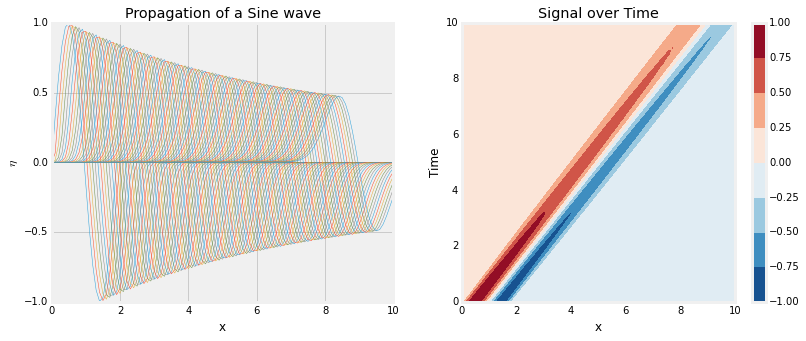

In [3]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(arange(0,n+1)*x_del,array(T),linewidth=0.5);plt.title('Propagation of a Sine wave')
plt.ylabel('$\eta$');plt.xlabel('x')
plt.subplot(122)
plt.contourf(arange(0,n+1)*x_del,arange(0,101)*t_del,array(T).T,cmap=cm.RdBu_r)
plt.colorbar();plt.title('Signal over Time');plt.xlabel('x');plt.ylabel('Time')
plt.show()

##1.2 - 1$^{st}$order in time and 4$^{th}$order in space

In this example, I've used the explicit Forward Euler scheme in time, and a fourth order centered-difference scheme in space. The discretization of equation (1) in this case takes the following form:
\begin{equation}
    \theta^{t+1}_{x} = \theta^{t}_{x} - \frac{\lambda}{12} \left[\theta^{t}_{x-2} - 8\theta^{t}_{x-1} + 8\theta^{t}_{x+1} - \theta^{t}_{x+2} \right]
\end{equation}

However, the fourth-order scheme requires two points spatially behind the point to be solved; in order to work around this limitation, I have applied the same first-order spatial scheme used above to the boundary cells and a second-order spatial scheme to the next immediate cell to provide a buffer for the interior iterative process.

In [4]:
c=1.
t_del = 0.1
x_del = 0.1
n=100;
t_steps=100

T=matrix(zeros((n+1,1)))
for t in range(3,23):
    T[t,0]=sin(((t-3)/19.)*2*pi)
    
Y=(c*t_del)/x_del
Y=0.7 #Force value to be less than one to illustrate dissipation
for Tint in range(0,t_steps):
    T=append(T,matrix(zeros((shape(T)[0],1))),axis=1)
    for int in range(0,shape(T)[0]-1):
            if int==0 or int==shape(T)[0]-2:
                T[int+1,Tint+1]=T[int+1,Tint]-Y*((T[int+1,Tint]-T[int,Tint]))
            elif int==1 or int==shape(T)[0]-3:
                T[int+1,Tint+1]=T[int+1,Tint]-Y*((T[int+1,Tint]-T[int-1,Tint])/2)
            else:
                T[int+1,Tint+1]=T[int+1,Tint]-Y*((T[int-2,Tint]-8*T[int-1,Tint]+8*T[int+1,Tint]-T[int+2,Tint])/(12))

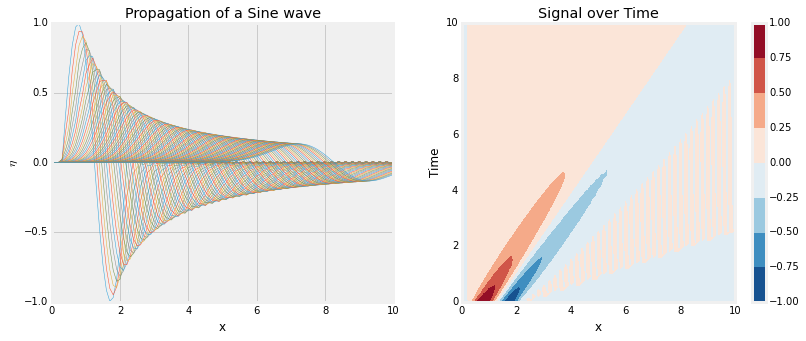

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(arange(0,n+1)*x_del,array(T),linewidth=0.5);plt.title('Propagation of a Sine wave')
plt.ylabel('$\eta$');plt.xlabel('x')
plt.subplot(122)
plt.contourf(arange(0,n+1)*x_del,arange(0,t_steps+1)*t_del,array(T).T,cmap=cm.RdBu_r)
plt.colorbar();plt.title('Signal over Time');plt.xlabel('x');plt.ylabel('Time')
plt.show()

##1.3 - 2$^{nd}$order in time and 4$^{th}$order in space

In this scenario, I have increased the accuracy of the above scheme only in time, using a second-order Leap-Frog method, while retaining the fourth-order centered-difference scheme in space. Thus, the discrete form of equation (1) has become:
\begin{equation}
    \theta^{t+1}_{x} = \theta^{t-1}_{x} - \frac{2\lambda}{12} \left[\theta^{t}_{x-2} - 8\theta^{t}_{x-1} + 8\theta^{t}_{x+1} - \theta^{t}_{x+2} \right]
\end{equation}

In [14]:
c=1.
t_del = 0.1
x_del = 0.1
n=100;
t_steps=600

T=matrix(zeros((n+1,1)))
for t in range(3,23):
    T[t,0]=sin(((t-3)/19.)*2*pi)
    
Y=(c*t_del)/x_del
Y=0.01 #Force value to be less than one to illustrate dissipation
for Tint in range(0,t_steps):
    T=append(T,matrix(zeros((shape(T)[0],1))),axis=1)
    for int in range(0,shape(T)[0]-1):
        if Tint==0:
            T[int+1,Tint+1]=T[int+1,Tint]-Y*((T[int+1,Tint]-T[int,Tint]))
        else:
            if int==0 or int==shape(T)[0]-2:
                T[int+1,Tint+1]=T[int+1,Tint-1]-2*Y*((T[int+1,Tint]-T[int,Tint]))
            elif int==1 or int==shape(T)[0]-3:
                T[int+1,Tint+1]=T[int+1,Tint-1]-2*Y*((T[int+1,Tint]-T[int-1,Tint])/2)
            else:
                T[int+1,Tint+1]=T[int+1,Tint-1]-2*Y*((T[int-2,Tint]-8*T[int-1,Tint]+8*T[int+1,Tint]-T[int+2,Tint])/(12))

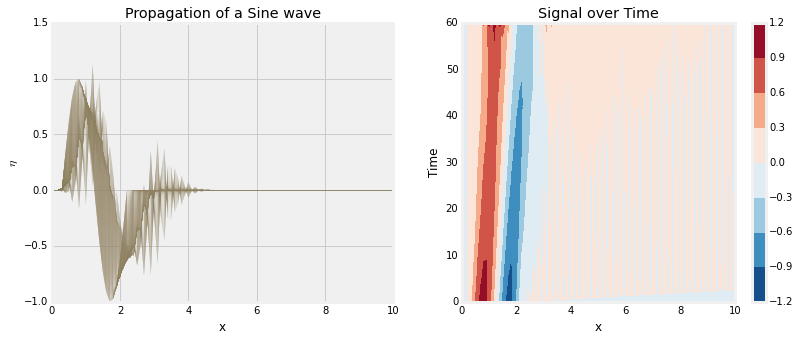

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(arange(0,n+1)*x_del,array(T),linewidth=0.05);plt.title('Propagation of a Sine wave')
plt.ylabel('$\eta$');plt.xlabel('x')
plt.subplot(122)
plt.contourf(arange(0,n+1)*x_del,arange(0,t_steps+1)*t_del,array(T).T,cmap=cm.RdBu_r)
plt.colorbar();plt.title('Signal over Time');plt.xlabel('x');plt.ylabel('Time')
plt.show()

By incrementally changing the accuracy (and thus order) of the schemes, it is apparent that the order of the time iteration scheme is much more important at driving dispersion and instabilities of the original signal. Increasing the spatial order serves to increase the dissipation of the signal, quickly spreading and muting the disturbance.

##1.4 - Evaluation of Amplification + Dispersion Relation

Amplitude error is evaluated from an entire scheme, while the dispersion (or phase error) is evaluated only from the spatial differencing scheme.

###Numerical Dissipation

For a Forward Euler method:
\begin{gather}
    \frac{\theta^{n+1} - \theta^{n}}{\Delta t} + c \left[ \frac{\theta^{n}_{i} - \theta^{n}_{i-1}}{\Delta x} \right] = 0 ~\text{for c > 0} \\
    \text{Take }\theta^{n} = \hat{\theta}^{n}e^{ikx} ~\text{assuming a wave form} \\
    \hat{\theta}^{n+1} = \hat{\theta}^{n} - \hat{\theta}^{n}c\frac{\Delta t}{\Delta x} \left[ e^{ikx} - e^{ik(x+\Delta x)} \right] \\
    \hat{\theta}^{n+1} = \hat{\theta}^{n} \left[ 1 - \lambda \left( 1 - e^{ik\Delta x} \right) \right] ~\text{where }\lambda = c\frac{\Delta t}{\Delta x} \\
    \frac{\hat{\theta}^{n+1}}{\hat{\theta}^{n}} = \left[ 1 - \lambda \left( 1 - \cos(k\Delta x) - i\sin(k\Delta x) \right) \right] \\
    \left[ \frac{\hat{\theta}^{n+1}}{\hat{\theta}^{n}} \right]^{2} = \left[ 1 - \lambda \left( 1 - \cos(k\Delta x) \right) \right]^{2} + \lambda^{2}\sin^{2}(k\Delta x) \\
    \text{Taking } k\Delta x = \frac{\pi}{2}: \\
    \left[ \frac{\hat{\theta}^{n+1}}{\hat{\theta}^{n}} \right]^{2} = \left[ 1 - \lambda \right]^{2} + \lambda^{2} \\
    \text{Therefore, for }\left[ \frac{\hat{\theta}^{n+1}}{\hat{\theta}^{n}} \right] \leq 1, \lambda = c\frac{\Delta t}{\Delta x} \leq 1
\end{gather}
Thus, we reach the CFL condition, required such that no waves outrun the explicit time-stepping method. Numerical dissipation occurs when $\lambda$ is less than one, as it effectively describes the change in amplitude of the signal from one time step to the next. Following a similar procedure for the leap-frog method:
\begin{gather}
    \frac{\theta^{n+1} - \theta^{n-1}}{2\Delta t} + c \left[ \frac{\theta^{n}_{i} - \theta^{n}_{i-1}}{\Delta x} \right] = 0 ~\text{for c > 0} \\
    \text{Thus, } \lambda = c\frac{2\Delta t}{\Delta x} \\
    \text{Jumping forward, we find} \\
    \left[ \frac{\hat{\theta}^{n+1} -\hat{\theta}^{n-1}}{\hat{\theta}^{n}} \right]^{2} = \lambda^{2} \left[1 - e^{ik\Delta x} + e^{2ik\Delta x} \right] \\
    \left[ \frac{\hat{\theta}^{n+1} -\hat{\theta}^{n-1}}{\hat{\theta}^{n}} \right]^{2} = \lambda^{2} \left[1 - (\cos(k\Delta x) + i\sin(k\Delta x)) + (\cos^{2}(k\Delta x) - \sin^{2}(k\Delta x)) \right] \\
    \text{If we now take } k\Delta x = \frac{\pi}{2}: \\
    \left[ \frac{\hat{\theta}^{n+1} -\hat{\theta}^{n-1}}{\hat{\theta}^{n}} \right]^{2} = \lambda^{2} \left[1 - 0 + (0 - 1) \right] = 0
\end{gather}
which we would hope, given that we wish the difference between signals to go to zero; thus, the leap-frog scheme is *not* dissipative, but can easily become unstable (as shown in the plot above). It's worth noting that these two examples utilize first order upwind spatial differencing schemes to look solely at the effects of different time-stepping methods.

###Numerical Dispersion

As numerical dispersion is primarily related to the spatial differencing scheme, the following examples examine the effects of the two schemes utilized above: the first order upwind scheme, and the fourth order centered-difference scheme. Beginning with the first order scheme:
\begin{gather}
    \frac{\delta \theta}{\delta t} + c \left[ \frac{\theta^{n}_{i} - \theta^{n}_{i-1}}{\Delta x} \right] = 0 ~\text{where we take } \theta^{n} = \hat{\theta}^{n}e^{i(kx-\omega t)} \\
    -i \omega + \frac{c}{\Delta x}\left[ 1 - e^{-ik\Delta x} \right] = 0 \\
    -i \omega = \frac{-c}{\Delta x}\left[ i\sin(k\Delta x) - \cos(k\Delta x) \right] \\
    \therefore \omega = \frac{c}{\Delta x}\sin(k\Delta x) \\
    \text{and } \frac{\delta \omega}{\delta k} = c_{g} = c \cos(k\Delta x)
\end{gather}
We will examine the dispersion relation below, but first I review the dispersion relation of the fourth-order centered-difference scheme:
\begin{gather}
    \frac{\delta \theta}{\delta t} + \frac{c}{12 \Delta x} \left[\theta^{n}_{x-2} - 8\theta^{n}_{x-1} + 8\theta^{n}_{x+1} - \theta^{n}_{x+2} \right] = 0 ~\text{where we take } \theta^{n} = \hat{\theta}^{n}e^{i(kx-\omega t)} \\
    -i \omega + \frac{c}{12\Delta x}\left[ e^{-2ik\Delta x} - 8e^{-ik\Delta x} +8e^{ik\Delta x} - e^{2ik\Delta x} \right] = 0 \\
    -i \omega = \frac{-c}{12\Delta x}\left[ -i\sin(2k\Delta x) + 8i\sin(k\Delta x) + 8i\sin(k\Delta x) - i\sin(2k\Delta x) \right] \\
    \therefore \omega = \frac{c}{6\Delta x} \left[8\sin(k\Delta x) - \sin(2k\Delta x) \right] \\
    \text{and } \frac{\delta \omega}{\delta k} = c_{g} = \frac{c}{3} \left[ 4\cos(k\Delta x) - \cos(2k\Delta x) \right]
\end{gather}

As inferred from the plot below, the fourth order scheme produces stable, nondispersive results for larger $\Delta x$ values than the first order scheme, which can roughly be seen in the close match between the fourth-order frequency and the linear ($\omega = ck$) frequency over larger wavenumbers.

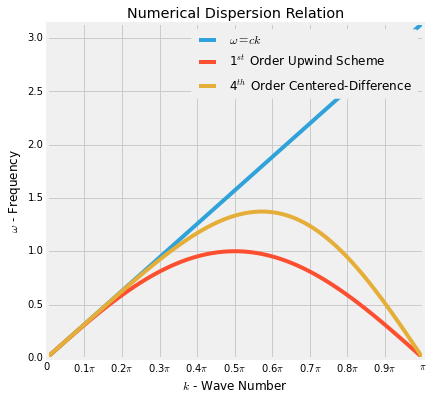

In [69]:
dx=1
c = 1.
k=arange(0,pi+0.1,pi/100.)

plt.figure(figsize=(6,6))
plt.plot(k,c*k)
plt.plot(k,(c/dx)*sin(k*dx))
plt.plot(k,(c/(6*dx))*(8*sin(k*dx) - sin(2*k*dx)))
plt.legend(['$\omega = ck$','1$^{st}$ Order Upwind Scheme','4$^{th}$ Order Centered-Difference'])
plt.xticks(arange(0,1.1,1/10.)*pi,['0','0.1$\pi$', '0.2$\pi$', '0.3$\pi$','0.4$\pi$','0.5$\pi$','0.6$\pi$','0.7$\pi$','0.8$\pi$','0.9$\pi$','$\pi$']);
plt.xlim((0,1*pi));plt.ylim((0,1*pi))
plt.ylabel('$\omega$ - Frequency');plt.xlabel('$k$ - Wave Number');plt.title('Numerical Dispersion Relation');
plt.show()

##Attempt to find points where C=C_g for each of the methods; did not look nice.
#k = pi/2.
#dx = arange(0,100+(1/50.),1/50.)+(1/50.)
#plt.figure(figsize=(6,6))
#plt.plot(dx,abs(((c/(dx*k))*(sin(k*dx)))/((c/(k))*(cos(k*dx)))))
#plt.plot(dx,abs(((c/(6*dx*k))*(8*sin(k*dx) - sin(2*k*dx)))/((c/(3*dx*k))*(4*cos(k*dx) - cos(2*k*dx)))))
#plt.legend(['1$^{st}$ Order Upwind','4$^{th}$ Order Centered']);plt.xlim((0,10));plt.ylim((0,10));
#plt.xlabel('$\delta x$');plt.ylabel('C/C$_{g}$')
#plt.show()


#2 - 2D Tracer Advection

We begin with a tracer advection equation of the form:
\begin{equation}
    \theta_{t} + {\bf u}\cdot\nabla\theta = S
\end{equation}
The tracer will be released within a 2D divergence-free velocity field, set up by creating a potential field, as shown below. As $\nabla^{2}\phi = 0$, we can solve for the velocity via $u = \phi_{x}$ and $v = \phi_{y}$, which will be divergence-free ($u_{x} + v_{y} =0$), and in this case produces cyclonic circulation about the center of the grid. I chose to provide an initial tracer distribution that is then advected through the grid, which has periodic boundaries in x and y. The periodicity should not create any issues, though, as the velocity distribution goes to zero at the boundaries.

To advect the tracer, I chose to implement a 1$^{st}$ order explicit Forward Euler scheme in time, and a 3$^{rd}$ order centered-difference scheme in space to calculate the fluxes of tracer into each grid cell; however, the differencing in space at the boundaries was adjusted to a 1$^{st}$ order scheme by necessity. Initially, I attempted to match a leap-frog scheme with the centered-difference spatial scheme, but found that the advection became unstable after $\sim$400 timesteps.


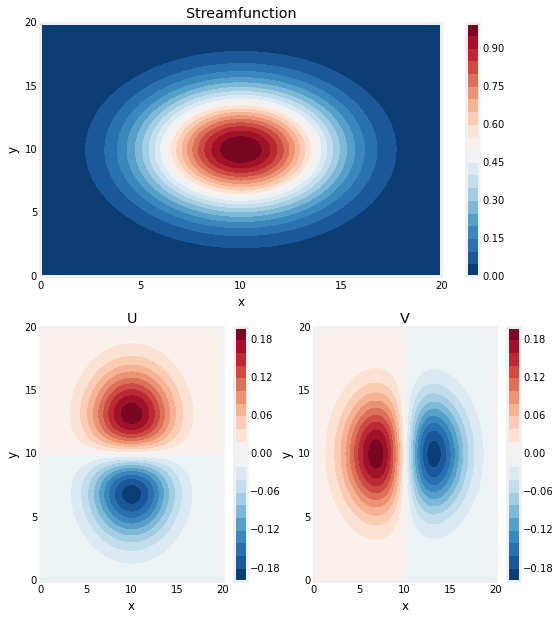

In [8]:
#Provide user-defined inputs
dx = 0.2
dy = 0.2
n=100;
m=100;
t_steps = 1200;

x = arange(0,n+1)*dx
y = arange(0,m+1)*dy


#Create non-divergent velocity field
Phi = zeros((n+1,m+1))
for t in range(0,n+1):
    for t2 in range(0,m+1):
        Phi[t,t2]= 1 * exp(-(x[t] - median(x))**2  / (2*(max(x)/2))) * exp(-(y[t2] - median(y))**2  / (2*(max(y)/2)))
[v,u]=gradient(Phi,dx,dy); u= -u;

#Calculate Dt to avoid violating CFL condition
dt = (0.4*dx)/sqrt(nanmax(u)**2 + nanmax(v)**2)


#Initialize tracer distribution for advection
T=zeros((n+1,m+1))
for t in range(0,n+1):
    for t2 in range(0,m+1):
        T[t,t2]= 0.95 * exp(-(x[t] - 7)**2  / (2*2)) * exp(-(y[t2] - 7)**2  / (2*5))

        
#Plot Velocity field       
plt.figure(figsize=(8,10));
plt.subplot(211)
plt.contourf(x,y,array(Phi).T,20,cmap=cm.RdBu_r)
plt.colorbar();plt.title('Streamfunction');plt.xlabel('x');plt.ylabel('y')
plt.subplot(223)
plt.contourf(x,y,array(u).T,20,cmap=cm.RdBu_r)
plt.colorbar();plt.title('U');plt.xlabel('x');plt.ylabel('y')
plt.subplot(224)
plt.contourf(x,y,array(v).T,20,cmap=cm.RdBu_r)
plt.colorbar();plt.title('V');plt.xlabel('x');plt.ylabel('y')
plt.show()

The above streamfunction, and corresponding velocity fields are now used to advect our tracer through the grid, following the specifications described above.

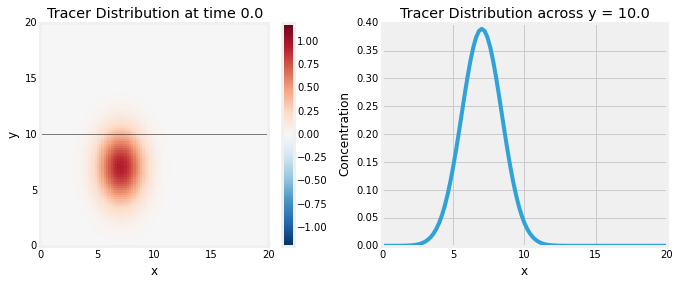

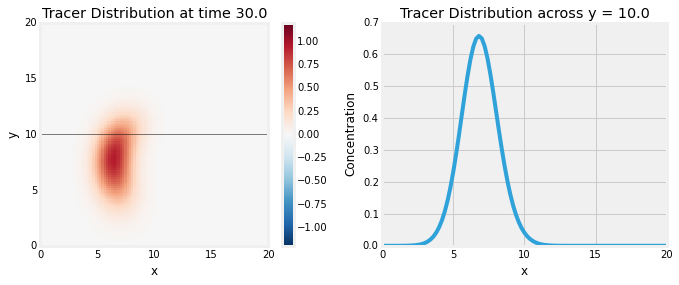

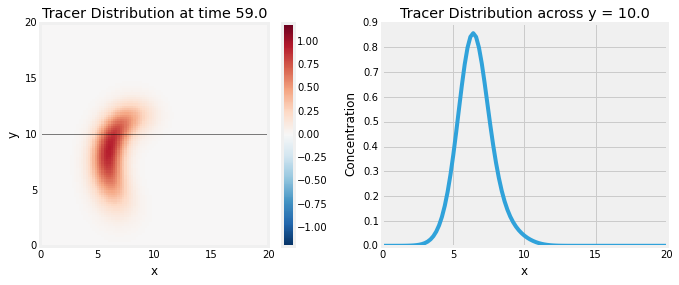

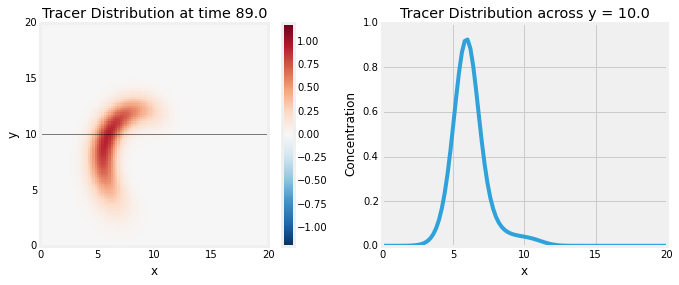

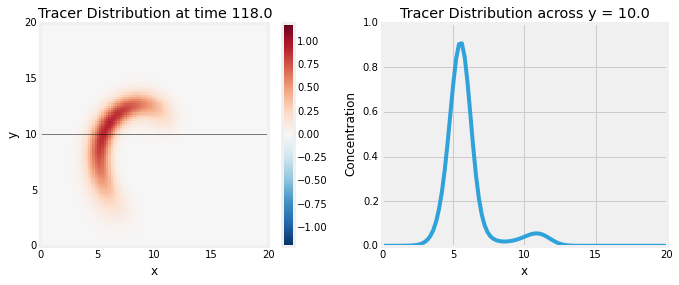

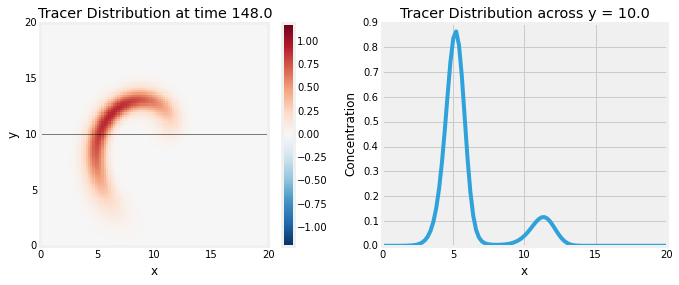

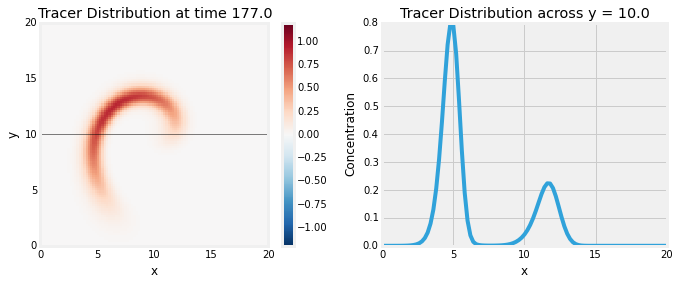

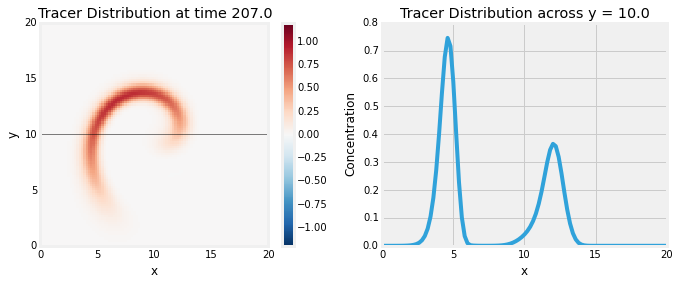

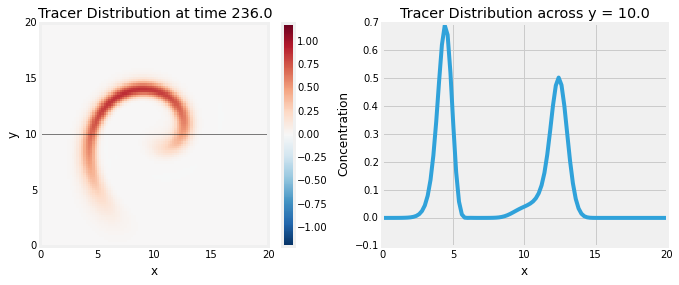

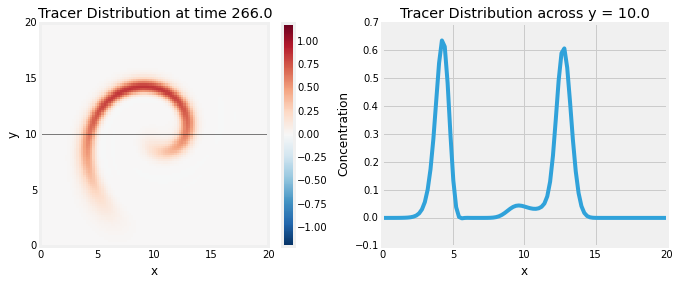

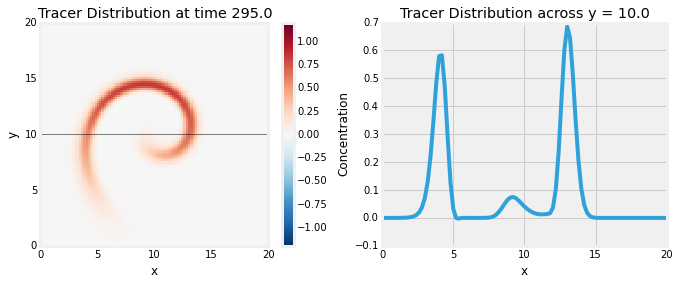

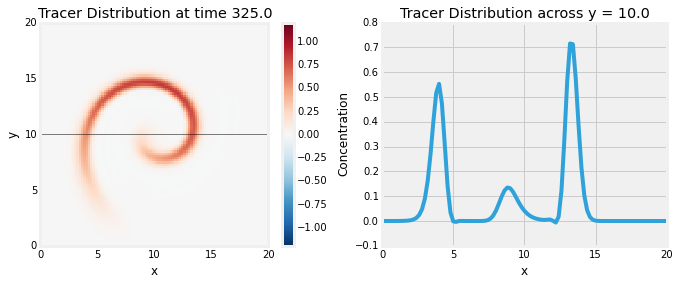

In [9]:
#Application of Advection scheme: Finite Volume + Flux form of equations

upos=[]; uneg=[];
vpos=[]; vneg=[];

T_old=zeros(shape(T))
T_new=zeros(shape(T))
T_old[:]=T[:]

#Begin time-stepping
for t in range(0,t_steps):

    upos[:] = 0.5*(u[:]+abs(u[:])); upos = array(upos)
    vpos[:] = 0.5*(v[:]+abs(v[:])); vpos = array(vpos)
    uneg[:] = 0.5*(u[:]-abs(u[:])); uneg = array(uneg)
    vneg[:] = 0.5*(v[:]-abs(v[:])); vneg = array(vneg)

    Dx=zeros((n+1,m+1))
    for i in range(0,n-1):
        Dx[i,:]=(T[i+1,:]-T[i,:])
    Dx[n,:]=(T[0,:]-T[n,:]) #Provide cyclical boundary conditions
    
    Dy=zeros((n+1,m+1))
    for i in range(0,m-1):
        Dy[:,i]=(T[:,i+1]-T[:,i])
    Dy[:,m]=(T[:,0]-T[:,m]) #Provide cyclical boundary conditions
    
    #Calculate Fluxes (using QUICK)
    fx=zeros((n+1,m+1))
    for i in range(0,n):
        if i==0 or i==n-1:
            fx[i,:] = 0.5*(T[i,:]+ T[i+1,:])* u[i,:]
        else:
            fx[i,:] = u[i,:]*0.5*(T[i+1,:]+T[i,:]) -0.125*upos[i,:]*(Dx[i,:]- Dx[i-1,:]) -0.125*uneg[i,:]*(Dx[i+1,:]-Dx[i,:]); #3rd Order
    fy=zeros((n+1,m+1))
    for i in range(0,m):
        if i==0 or i==m-1:
            fy[:,i] = 0.5*(T[:,i]+ T[:,i+1])* v[:,i]
        else:
            fy[:,i] = v[:,i]*0.5*(T[:,i+1]+T[:,i]) -0.125*vpos[:,i]*(Dy[:,i]- Dy[:,i-1]) -0.125*vneg[:,i]*(Dy[:,i+1]-Dy[:,i]); #3rd Order

    #Adjust to be a leapfrog scheme after the first timestep
    if t==0:
        C=1
    else: C=1
        
    for i in range(1,n):
        for j in range(1,m):
            T_new[i,j] = T[i,j] - C*dt*(-fx[i-1,j]+fx[i,j]-fy[i,j-1]+fy[i,j])

    #Boundary 
    T_new[n,:]=T_new[n-1,:]
    T_new[0,:]=T_new[1,:]
    T_new[:,m]=T_new[:,m-1]
    T_new[:,0]=T_new[:,1]
    
    T_old[:]=T[:]
    T[:]=T_new[:]
    
    if t%100 == 0:
        plt.figure(figsize=(10,4))
        plt.subplot(121);plt.pcolor(x,y,T.T,cmap=cm.RdBu_r)
        plt.clim([-1.2,1.2]);plt.plot(x,ones(shape(x))*(50*dy),linewidth=0.5,color='k')
        plt.colorbar();plt.title('Tracer Distribution at time '+str(round(t*dt)))
        plt.xlabel('x');plt.ylabel('y')
        plt.subplot(122);plt.plot(x,T[:,50].T)
        plt.title('Tracer Distribution across y = '+str(50*dy))
        plt.ylabel('Concentration');plt.xlabel('x')
        plt.show()

##Conclusions / Reflections

The advection of the tracer by the explicit Forward Euler scheme produces smooth, stable results. I believe the apparent advection of tracer toward the center of the grid is the result of the initial tracer distribution as opposed to an inward drift of tracer (which would imply that the initial velocity field is in fact divergent). 

It was quite difficult to convert the one dimensional advection problem into two dimensions, especially when beginning to think about the equations in flux form, which took some time sorting out in the code. However, once the code was written properly, it is much easier to see and understand the physics at the basis of the equations. This assignment has provided a nice step into two-dimensional modelling, especially as the advection of a tracer and coupled equations are almost a necessity when modelling estuarine topics of interest.